In [1]:
pip install dask[complete]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00


In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=dd.read_csv('/content/Zomato Dataset.csv',dtype={'Delivery_person_Age': 'float64'})

In [4]:
df = df.compute()
df.dropna(inplace=True)

In [5]:
#converting categorial values into numeric
# Encode categorical columns
label_encoders = {}
categorical_cols = ["Weather_conditions", "Road_traffic_density", "Type_of_order", "Type_of_vehicle", "Festival", "City"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
!pip install haversine

In [8]:
#Calculate Delivery Distance
from haversine import haversine

# Function to calculate distance
def calc_distance(row):
    start = (row["Restaurant_latitude"], row["Restaurant_longitude"])
    end = (row["Delivery_location_latitude"], row["Delivery_location_longitude"])
    return haversine(start, end)  # Distance in km

# Apply distance calculation
df["distance_km"] = df.apply(calc_distance, axis=1)


In [9]:
#Drop unnecessary columns
df.drop(["ID", "Delivery_person_ID", "Order_Date", "Time_Orderd", "Time_Order_picked",
         "Restaurant_latitude", "Restaurant_longitude",
         "Delivery_location_latitude", "Delivery_location_longitude"], axis=1, inplace=True)


In [10]:
#Splitting data into testsets
# Define features (X) and target variable (y)
X = df.drop("Time_taken (min)", axis=1)
y = df["Time_taken (min)"]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Model training
# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
#Model evaluation
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R-squared (R² Score): {r2:.2f}")

📌 Mean Absolute Error (MAE): 3.08
📌 Root Mean Squared Error (RMSE): 3.87
📌 R-squared (R² Score): 0.83


<ipython-input-13-dfbe56a5ba28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


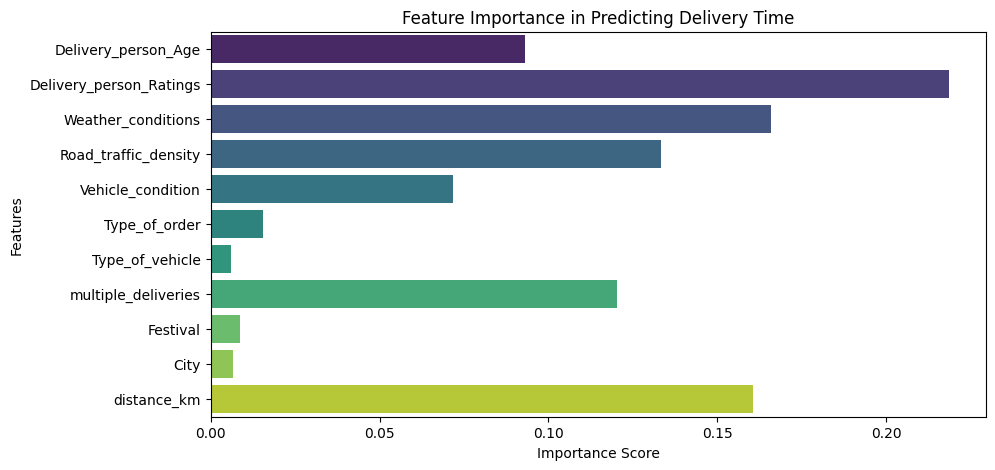

In [13]:
#Feature importance visualization
# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Delivery Time")
plt.show()